## Discussion Related with Outliers And Impact on Machine Learning

#### which machine learning models are sensitive to outliers?
1. Naivye Bayes Classifier --- Not Sensitive to Outliers
2. SVM --- No 
3. Linear regression --- Yes
4. Logistic Regression --- Yes
5. Decision Tree Regressor or Classifier --- No
6. Ensemble(Random Forest, XGboost, GB) --- No 
7. KNN --- No 
8. Kmeans --- Yes 
9. Hierarical --- Yes
10. Principle Component Analysis (PCA) --- Yes
11. Neural Networks --- Yes

--> All the unsupervised learning technique are generally sensitive to outliers.

In [1]:
import pandas as pd
import numpy as np


In [2]:
df= pd.read_csv(r"C:\Users\NEHA1\Documents\data science\Feature engineering\Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df['Age'].isnull().sum()

177

In [4]:
import seaborn as sns

C:\Users\NEHA1\AppData\Local\Temp\ipykernel_19232\315930958.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'].dropna())


<Axes: xlabel='Age', ylabel='Density'>

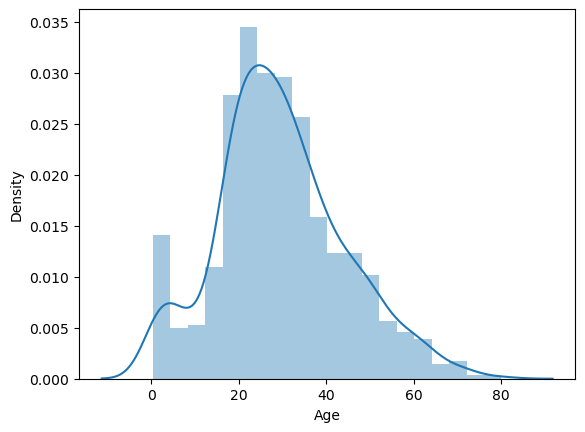

In [5]:
sns.distplot(df['Age'].dropna())

C:\Users\NEHA1\AppData\Local\Temp\ipykernel_19232\827162487.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'].fillna(100))


<Axes: xlabel='Age', ylabel='Density'>

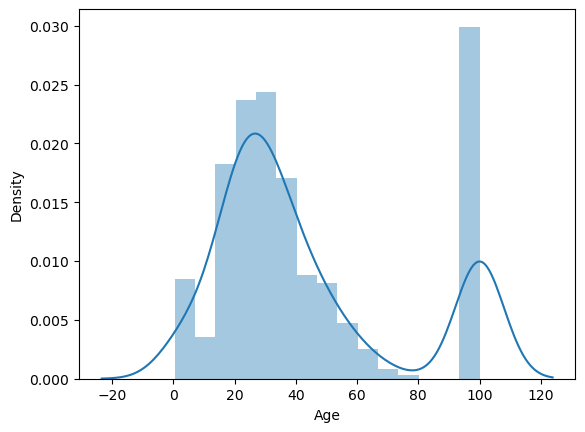

In [6]:
sns.distplot(df['Age'].fillna(100))

Text(0, 0.5, 'No. of passenger')

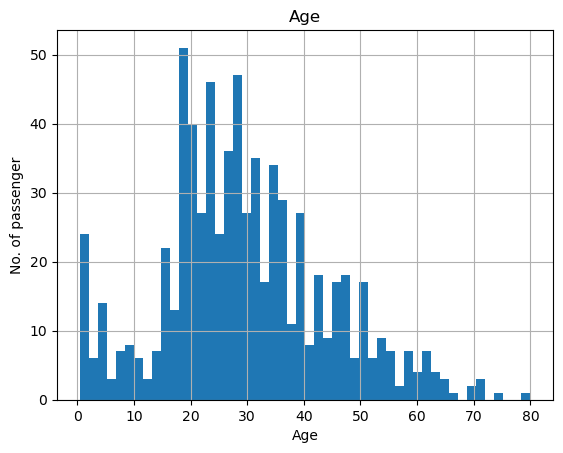

In [8]:
figure =df.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No. of passenger')

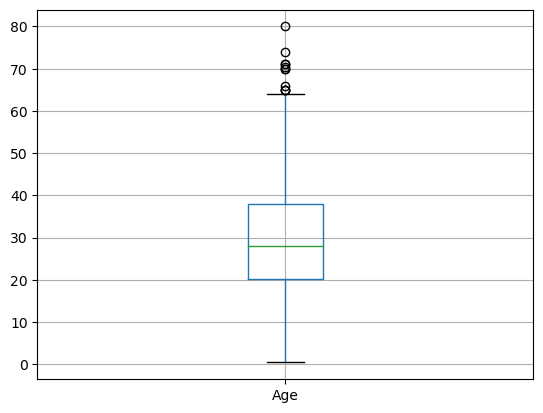

In [9]:
figure= df.boxplot(column='Age')

<Axes: >

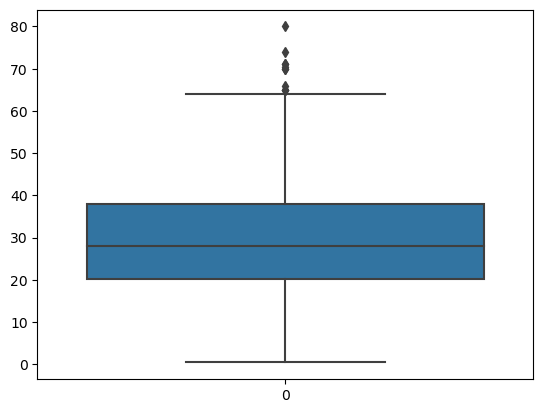

In [13]:
sns.boxplot(df['Age'])

In [14]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [16]:
# assuming age follows a Gaussain distributon
# we will calculate the boundries which differentiates the outliers

upper = df['Age'].mean() + 3*df['Age'].std()
lower = df['Age'].mean() - 3*df['Age'].std()

In [17]:
upper, lower

(73.27860964406095, -13.88037434994331)

In [19]:
# IQR to calculate the boundries

iqr = df.Age.quantile(0.75)-df.Age.quantile(0.25)
iqr

17.875

In [21]:
lower_bridge=df.Age.quantile(0.25) - (1.5*iqr)
upper_bridge=df.Age.quantile(0.75) + (1.5*iqr)
lower_bridge, upper_bridge

(-6.6875, 64.8125)

In [22]:
# Extreme outliers
lower_bridge=df.Age.quantile(0.25) - (3*iqr)
upper_bridge=df.Age.quantile(0.75) + (3*iqr)
lower_bridge, upper_bridge

(-33.5, 91.625)

## Feature is skewed

Text(0, 0.5, 'No. of passenger')

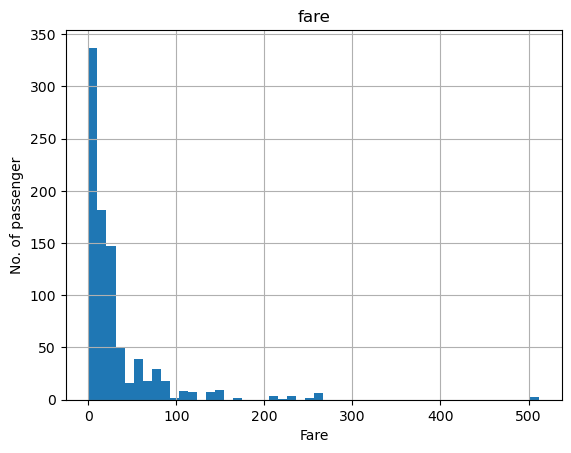

In [23]:
figure =df.Fare.hist(bins=50)
figure.set_title('fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No. of passenger')

<Axes: >

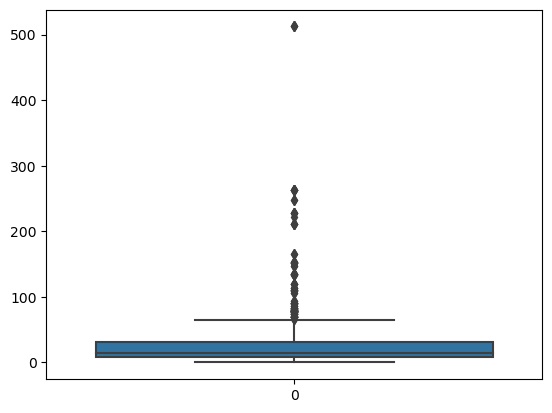

In [24]:
sns.boxplot(df.Fare)

In [25]:
df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [26]:
# IQR to calculate the boundries

iqr = df.Fare.quantile(0.75)-df.Fare.quantile(0.25)
iqr

23.0896

In [27]:
lower_bridge=df.Fare.quantile(0.25) - (1.5*iqr)
upper_bridge=df.Fare.quantile(0.75) + (1.5*iqr)
lower_bridge, upper_bridge

(-26.724, 65.6344)

In [28]:
# Extreme outliers
lower_bridge=df.Fare.quantile(0.25) - (3*iqr)
upper_bridge=df.Fare.quantile(0.75) + (3*iqr)
lower_bridge, upper_bridge

(-61.358399999999996, 100.2688)

In [30]:
data= df.copy()

In [31]:
data.loc[data.Age>73, 'Age']=73

In [32]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
data.loc[data.Fare>=100, 'Fare']=100

Text(0, 0.5, 'No. of passenger')

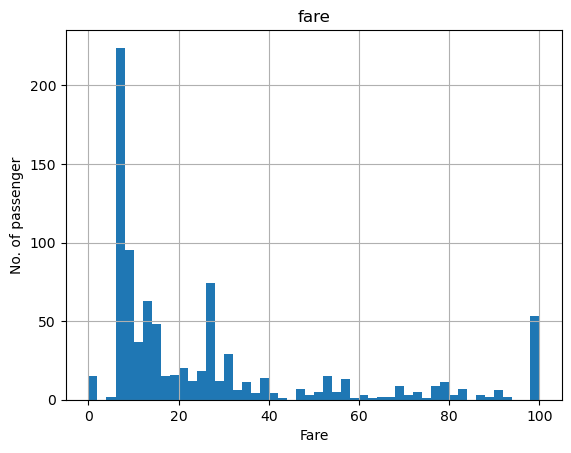

In [36]:
figure =data.Fare.hist(bins=50)
figure.set_title('fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No. of passenger')

Text(0, 0.5, 'No. of passenger')

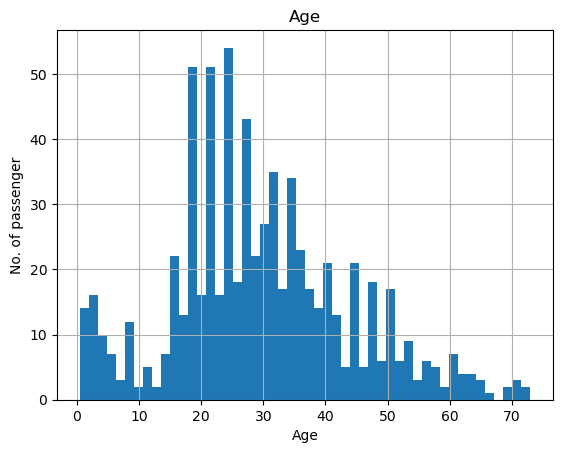

In [38]:
figure =data.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No. of passenger')

In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(data[['Age','Fare']].fillna(0),data['Survived'], test_size=0.3)

In [41]:
## logistic regression

from sklearn.linear_model import LogisticRegression

In [43]:
classifier= LogisticRegression()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_pred1 = classifier.predict_proba(x_test)

from sklearn.metrics import accuracy_score, roc_auc_score
print('Accuracy_score: {}'.format(accuracy_score(y_test,y_pred)))
print('Roc_Auc_score: {}'.format(roc_auc_score(y_test, y_pred1[:,1])))


Accuracy_score: 0.6529850746268657
Roc_Auc_score: 0.6749010156653469


In [44]:
## Random Forest

from sklearn.ensemble import RandomForestClassifier
classifier= RandomForestClassifier()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_pred1 = classifier.predict_proba(x_test)

from sklearn.metrics import accuracy_score, roc_auc_score
print('Accuracy_score: {}'.format(accuracy_score(y_test,y_pred)))
print('Roc_Auc_score: {}'.format(roc_auc_score(y_test, y_pred1[:,1])))


Accuracy_score: 0.6343283582089553
Roc_Auc_score: 0.6934928559132382
